In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
table = pd.read_excel('/content/CDX.NA.IG39 Tranche data.xlsx', sheet_name = None, usecols=[1, 2], header=0)
list(table.keys())

['0-3%', '3-7%', '7-15%', '15-100%', 'CDX_quote']

In [3]:
for table_name, table_content in table.items():
    print(f'Table {table_name}:\n{table_content.head()}\n')

Table 0-3%:
  2024-10-31 00:00:00                  Unnamed: 2
0          2024-10-30                      15.828
1          2024-10-29                      15.847
2          2024-10-28                      16.273
3                 NaT                         NaN
4          2024-10-25  1900-01-15 21:37:26.400000

Table 3-7%:
  2024-10-31 00:00:00  Unnamed: 2
0          2024-10-30      -0.098
1          2024-10-29      -0.058
2          2024-10-28       0.026
3                 NaT         NaN
4          2024-10-25      -0.071

Table 7-15%:
  2024-10-31 00:00:00  Unnamed: 2
0          2024-10-30      -2.164
1          2024-10-29      -2.185
2          2024-10-28      -2.140
3                 NaT         NaN
4          2024-10-25      -2.182

Table 15-100%:
  2024-10-31 00:00:00  Unnamed: 2
0          2024-10-30      -2.720
1          2024-10-29      -2.731
2          2024-10-28      -2.716
3                 NaT         NaN
4          2024-10-25      -2.735

Table CDX_quote:
  2024-10-31 00

In [4]:
def process_sheet(df):
    df.columns = ['Date', 'Price']
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df.sort_values('Date', inplace=True)
    return df

In [5]:
list(table.values())[0]

,2024-10-31 00:00:00,Unnamed: 2
0,2024-10-30,15.828
1,2024-10-29,15.847
2,2024-10-28,16.273
3,NaT,NaN
4,2024-10-25,1900-01-15 21:37:26.400000
...,...,...
633,NaT,NaN
634,2022-10-21,50.584
635,2022-10-20,49.681
636,2022-10-19,49.692


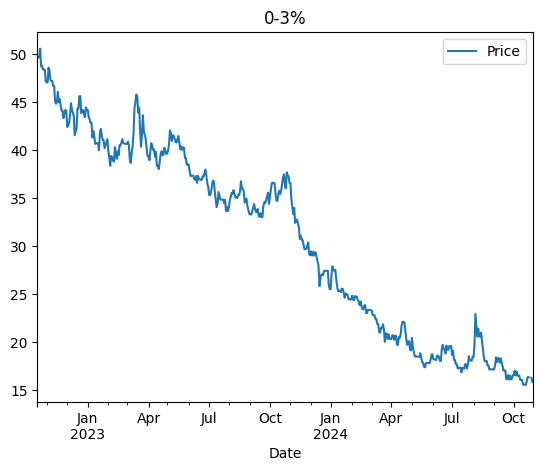

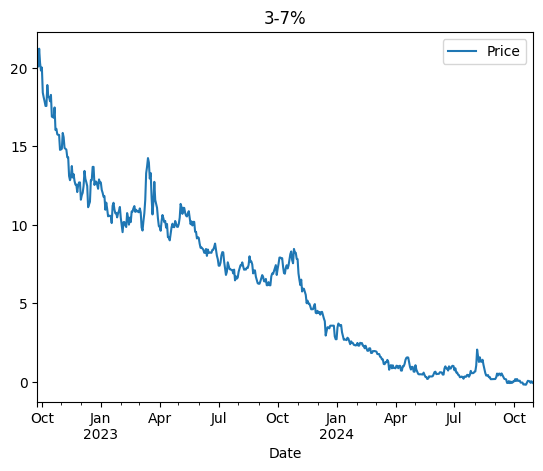

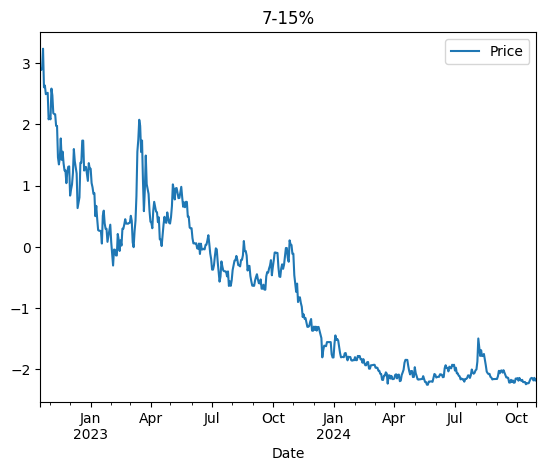

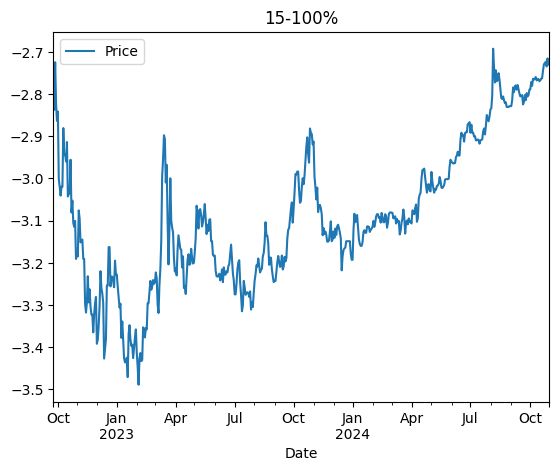

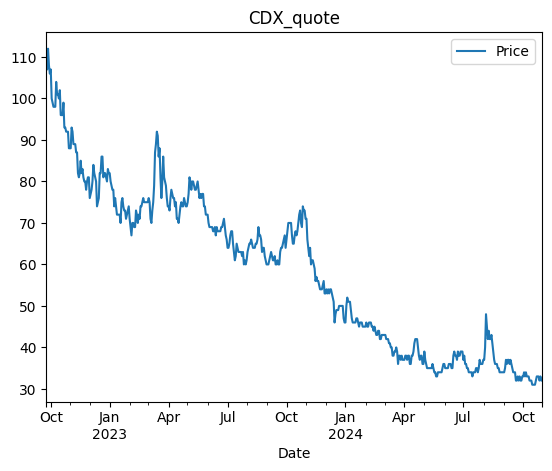

In [6]:
for i in range(len(list(table.values()))):
    # print(list(table.keys())[i])
    process_sheet(list(table.values())[i]).plot(x='Date', y='Price', title=list(table.keys())[i])

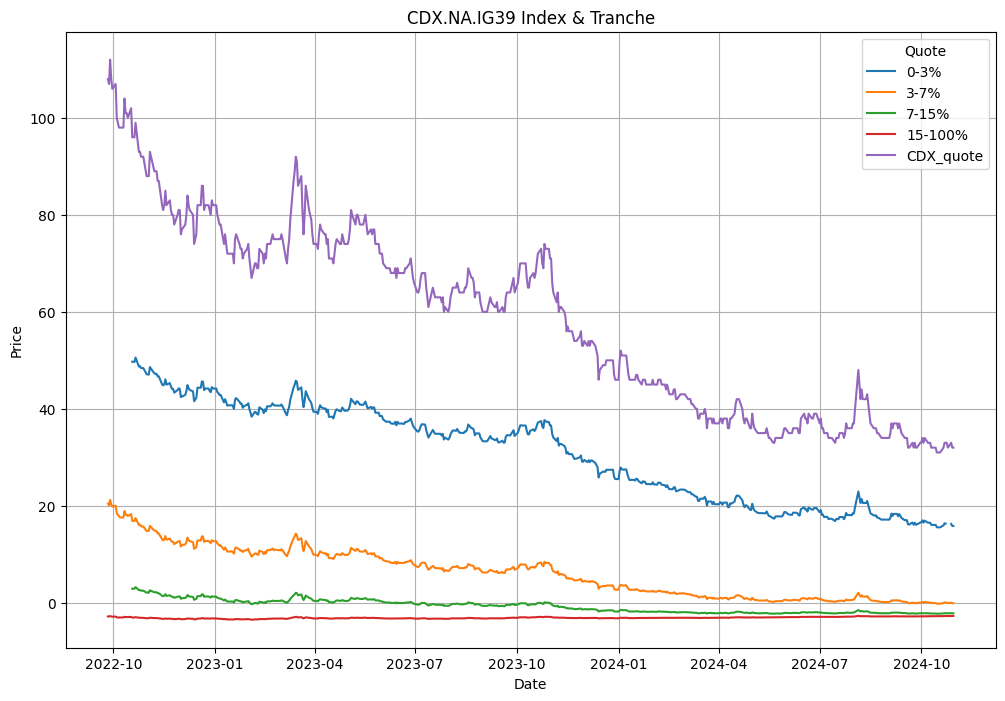

In [7]:
plt.figure(figsize=(12, 8))

for sheet_name, df in table.items():
    plt.plot(df['Date'], df['Price'], label=sheet_name)

plt.title("CDX.NA.IG39 Index & Tranche")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Quote")
plt.grid(True)

plt.show()

In [8]:


filter = {}
for sheet_name, df in table.items():
    df['Percent Change'] = df['Price'].pct_change()
    daily_thre = df[abs(df['Percent Change']) > 0.1]
    if not daily_thre.empty:
        filter[sheet_name] = daily_thre
filter

<ipython-input-8-55235822288a>:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Percent Change'] = df['Price'].pct_change()


{'0-3%':          Date   Price  Percent Change
 74 2024-08-05  22.949        0.164097,
 '3-7%':           Date   Price  Percent Change
 589 2022-12-13  11.127       -0.108413
 586 2022-12-16  12.854        0.120077
 557 2023-01-19  11.215        0.108530
 512 2023-03-13  13.294        0.146529
 505 2023-03-21  11.737       -0.117983
 ..         ...     ...             ...
 6   2024-10-23   0.036       -0.409836
 4   2024-10-25  -0.071       -3.088235
 2   2024-10-28   0.026       -1.366197
 1   2024-10-29  -0.058       -3.230769
 0   2024-10-30  -0.098        0.689655
 
 [117 rows x 3 columns],
 '7-15%':           Date  Price  Percent Change
 634 2022-10-21  3.234        0.112870
 632 2022-10-24  2.604       -0.194805
 626 2022-10-31  2.081       -0.172235
 623 2022-11-03  2.583        0.241230
 620 2022-11-07  2.181       -0.117718
 ..         ...    ...             ...
 288 2023-11-29 -1.368        0.160305
 275 2023-12-14 -1.805        0.211409
 263 2023-12-28 -1.755        0.127892

In [9]:
tranche1_df = table['0-3%']
tranche2_df = table['3-7%']
tranche3_df = table['7-15%']
tranche4_df = table['15-100%']
index_df = table['CDX_quote']

merged_data = tranche1_df.merge(tranche2_df, on='Date', suffixes=('_0-3%', '_3-7%'))
merged_data = merged_data.merge(tranche3_df, on='Date', suffixes=('', '_7-15%'))
merged_data = merged_data.merge(tranche4_df, on='Date', suffixes=('', '_15-100%'))
merged_df = merged_data.merge(index_df, on='Date', suffixes=('', '_index'))

merged_df

,Date,Price_0-3%,Percent Change_0-3%,Price_3-7%,Percent Change_3-7%,Price,Percent Change,Price_15-100%,Percent Change_15-100%,Price_index,Percent Change_index
0,2022-10-18,49.730,NaN,16.901,-0.075943,2.915,NaN,-3.043,0.044269,96.0,-0.058824
1,2022-10-19,49.692,-0.000764,16.886,-0.000888,2.887,-0.009605,-3.038,-0.001643,96.0,0.000000
2,2022-10-20,49.681,-0.000221,16.830,-0.003316,2.906,0.006581,-3.032,-0.001975,96.0,0.000000
3,2022-10-21,50.584,0.018176,17.489,0.039156,3.234,0.112870,-2.956,-0.025066,99.0,0.031250
4,2022-10-24,48.750,-0.036257,16.053,-0.082109,2.604,-0.194805,-3.081,0.042287,93.0,-0.060606
...,...,...,...,...,...,...,...,...,...,...,...
527,2024-10-24,NaN,0.000000,0.034,-0.055556,-2.146,0.002335,-2.724,-0.001100,33.0,0.000000
528,2024-10-25,NaN,0.000000,-0.071,-3.088235,-2.182,0.016775,-2.735,0.004038,32.0,-0.030303
529,2024-10-28,16.273,-0.004892,0.026,-1.366197,-2.140,-0.019248,-2.716,-0.006947,33.0,0.031250
530,2024-10-29,15.847,-0.026178,-0.058,-3.230769,-2.185,0.021028,-2.731,0.005523,32.0,-0.030303


##  Gaussian copula model


Simulate data： we can replace it when we get all cds of the 125 issuers.

In [ ]:
import numpy as np
import pandas as pd


np.random.seed(42)
n_obligors = 125


cds_data = [
    {
        'Obligor': f'Company_{i+1}',
        '5Y_CDS_Spread (bps)': np.random.uniform(50, 150)
    }
    for i in range(n_obligors)
]

cds_data


[{'Obligor': 'Company_1', '5Y_CDS_Spread (bps)': 87.45401188473625},
 {'Obligor': 'Company_2', '5Y_CDS_Spread (bps)': 145.07143064099162},
 {'Obligor': 'Company_3', '5Y_CDS_Spread (bps)': 123.1993941811405},
 {'Obligor': 'Company_4', '5Y_CDS_Spread (bps)': 109.86584841970367},
 {'Obligor': 'Company_5', '5Y_CDS_Spread (bps)': 65.60186404424365},
 {'Obligor': 'Company_6', '5Y_CDS_Spread (bps)': 65.59945203362027},
 {'Obligor': 'Company_7', '5Y_CDS_Spread (bps)': 55.80836121681995},
 {'Obligor': 'Company_8', '5Y_CDS_Spread (bps)': 136.6176145774935},
 {'Obligor': 'Company_9', '5Y_CDS_Spread (bps)': 110.11150117432088},
 {'Obligor': 'Company_10', '5Y_CDS_Spread (bps)': 120.80725777960456},
 {'Obligor': 'Company_11', '5Y_CDS_Spread (bps)': 52.05844942958024},
 {'Obligor': 'Company_12', '5Y_CDS_Spread (bps)': 146.99098521619942},
 {'Obligor': 'Company_13', '5Y_CDS_Spread (bps)': 133.24426408004217},
 {'Obligor': 'Company_14', '5Y_CDS_Spread (bps)': 71.23391106782762},
 {'Obligor': 'Company_1

# New Section

In [ ]:
# import numpy as np
# import pandas as pd


# np.random.seed(42)
# n_obligors = 125


# cds_data = {
#     'Obligor': [f'Company_{i+1}' for i in range(n_obligors)],
#     '5Y_CDS_Spread (bps)': np.random.uniform(50, 150, n_obligors)
# }

# cds_df = pd.DataFrame(cds_data)


# cds_df.head(10)


In [ ]:
# The paramaters
n_obligors = 125  # the number of cdx(how many companies in the cdx)
rho = 0.2  # base correlation (I remember you can find it on the bloomberg)
#tranche_levels = [0.03, 0.07, 0.10, 0.15, 0.30]
tranche_levels = [0.03, 0.07, 0.15, 1.00] #
#cds_spreads = np.random.uniform(50, 150, n_obligors)

In [ ]:
import numpy as np
from scipy.optimize import newton

class CDS:
    def __init__(self, cTenors, cSpreads, premiumFrequency, defaultFrequency, recoveryRate):
        self.cTenors = cTenors
        self.cSpreads = cSpreads
        self.premiumFrequency = premiumFrequency
        self.defaultFrequency = defaultFrequency
        self.recoveryRate = recoveryRate

    # DF and Pt functions remain unchanged
    def DF(self, yTenors, yRate, t):
        '''The main purpose of this function is to provide a general method
        for calculating the discount factor based on a given yield curve and
        a specific point in time.'''
        # yTenors: time points of yield curve
        # yRate: yield rates wrt yTenors

        result = -1
        left = 0
        right = len(yTenors) - 1

        if t < 0: #negative time
            result = - 1 #invalide input

        elif t == 0:     #present time
            result = 1.0 #no need to discount
        elif t > 0 and t <= yTenors[left]:
            #result = 1/(1+yRate[0])**t
            result = np.exp(-t*yRate[0])
            #If the target time t is at the leftmost end
            #of the yield curve (t <= yTenors[left]), use
            #the leftmost yield yRate[0] to calculate the discount factor.
        elif t >= yTenors[right]:
            #result = 1/(1+yRate[-1])**t
            result = np.exp(-t*yRate[-1])
        else:
            for i in range(right):
                #find the interval where t lies
                if t >= yTenors[i] and t < yTenors[i+1]:
                    yield_sim = yRate[i] + (yRate[i+1] - yRate[i]) / (yTenors[i+1]-yTenors[i]) * (t-yTenors[i])
                    #result = 1/(1+yield_sim)**t
                    #In financial practice, linear interpolation is a common technique used to fill gaps
                    #in the interest rate curve so that the calculation of the financial model can be
                    #performed at any point in time that is needed

                    result = np.exp(-t*yield_sim)#continuous compounding
        return result

    def Pt(self, cTenors, survProb, t):
        # cTenors: time points of cds curve
        # survProb: survival probability
        # The Pt function provides a method to estimate the probability of survival
        #at any point in time by interpolating and extrapolating the probability
        #of survival.
        result = -1
        left = 0
        right = len(cTenors) - 1
        if t < 0:
            result = -1#invalid input
        elif t == 0:
            result = 1 #survival prob =1
        elif t > 0 and t <= cTenors[left]:
            # h = hazard rate
            h = -np.log(survProb/ cTenors[left])# average hazard rate
            #survProb[0] represents the probability of survival at the first term point cTenors[left].
            #Assuming that the risk rate is constant during this period, the risk rate can be inversely
            #deduced from the relationship between survival probability and time. Specifically, the
            #probability of survival can be expressed by the exponential function e^(-h*t), where h
            #is the risk rate and t is the time.
            result = np.exp(-h*t)
            #Once we have the risk rate h, we can use it to calculate the probability of
            #survival at any time t. The result here is the probability of survival at time t,
            #calculated using the same exponential decay model exp(-h*t).
            #This process assumes a constant risk rate, which is a simplified model. In practice,
            #the risk rate may vary over time and other factors.
        elif t == cTenors[right]:
            result = survProb[-1]
        elif t > cTenors[right]:
            h = 0
            #When time t exceeds the last period point on the CDS curve, the probability of
            #survival needs to be extraposed. First, calculate the risk rate h. There are two situations:
            #If the CDS curve has only one expiration point, the risk rate is calculated by this unique
            #survival probability and duration point.

            #If there are multiple deadline points, the risk rate is calculated by the survival probability
            #corresponding to the last two deadline points.

            if len(cTenors) == 1:
                h =  - np.log(survProb[-1]) / cTenors[right]
            else:
                h = - np.log(survProb[-1]/survProb[-2]) / (cTenors[-1]-cTenors[-2])
                result = survProb[-1] * np.exp(-h*(t - cTenors[right]))
        else:
            for i in range(right):
                #find the interval where t lies
                if t >= cTenors[i] and t < cTenors[i+1]:
                    h = -np.log(survProb[i+1]/survProb[i]) / (cTenors[i+1]-cTenors[i])
                    result = survProb[i] * np.exp(-h*(t-cTenors[i]))
                    #This is the most complicated situation. When time t is between the
                    #two period points on the CDS curve, you first need to find the interval
                    #where t is located. Then, the risk rate h in this interval is calculated
                    #by the survival probability of the two adjacent period points. After obtaining
                    #the risk rate, use this risk rate to interpolate to calculate the survival
                    #probability of time t.
        return result


    def PremiumLeg(self, cTenors, survProb, yTenors, yRate, maturity, num_count, spread, h):
        right = len(cTenors) - 1

        if right > 0 and maturity <= cTenors[right]:
            RPV01 = 0
            N = int(maturity*num_count)
            for n in range(1, N+1):
                tn = n / num_count
                tn_1 = (n-1) / num_count
                dt = 1.0 / num_count
                RPV01 += 0.5 * dt * self.DF(yTenors, yRate, tn) * (self.Pt(cTenors, survProb, tn) + self.Pt(cTenors, survProb, tn_1) )
            return spread * RPV01
        else:
            RPV01 = 0
            N = int(maturity * num_count)
            M = cTenors[right] * num_count if right >= 0 else 0
            for n in range(1, N+1):
                if n <= M:
                    tn = n/num_count
                    tn_1 = (n-1)/num_count
                    dt = 1.0 / num_count
                    RPV01 += 0.5 * dt * self.DF(yTenors, yRate, tn) * (self.Pt(cTenors, survProb, tn) + self.Pt(cTenors, survProb, tn_1) )
                else:
                    tn = n/num_count
                    tn_1 = (n-1)/num_count
                    tM = M / num_count
                    dt = 1.0 / num_count
                    Pt_n = self.Pt(cTenors, survProb, tM) * np.exp(-h*(tn - tM))
                    Pt_n_1 = 0
                    if tn_1 <= tM:
                        Pt_n_1 = self.Pt(cTenors, survProb, tn_1)
                    else:
                        Pt_n_1 = self.Pt(cTenors, survProb, tM) * np.exp(-h*(tn_1 - tM))

                    RPV01 += 0.5 * dt * self.DF(yTenors, yRate, tn) * (Pt_n + Pt_n_1)
                    #This coefficient is because the survival probability and discount
                    #factor are applied in half a time period (that is, assuming that
                    #the premium payment is made in the middle of each time period).
                    #Therefore, the contribution of each time period to RPV01 is the
                    #average of two halves, so it is multiplied by 0.5.
            return spread * RPV01
            #RPV01 means "a basis point of the present value of risk", which is an indicator to
            #measure the sensitivity of CDS market value to spread changes. Specifically, it represents
            #how the present value of the CDS contract will change if the spread of CDS changes by 1 basis point (i.e. 0.01%).


    def DefaultLeg(self, cTenors, survProb, yTenors, yRate, maturity, num_count, RR, h):
        right = len(cTenors) - 1
        if right > 0 and maturity <= cTenors[right]:
            res = 0 #Used to accumulate contributions for each time period，Determine whether the expiration period of the contract is within the term of the CDS curve.
            N = int(maturity * num_count)
            for n in range(1, N+1):
                tn = n / num_count
                tn_1 = (n-1) / num_count
                res += self.DF(yTenors, yRate, tn)*(self.Pt(cTenors, survProb, tn_1) - self.Pt(cTenors, survProb, tn))
            return (1 - RR) * res
        else:
            res = 0
            N = int(maturity*num_count)
            M = cTenors[right] * num_count if right >= 0 else 0

            for n in range(1, N+1):
                if n <= M:
                    tn = n / num_count
                    tn_1 = (n-1) / num_count
                    res += self.DF(yTenors, yRate, tn)*(self.Pt(cTenors, survProb, tn_1) - self.Pt(cTenors, survProb, tn))
                else:  # n > m
                    tM = M / num_count
                    tn = n / num_count
                    tn_1 = (n-1) / num_count

                    Pt_n = self.Pt(cTenors, survProb, tM) * np.exp(-h*(tn-tM))
                    #For each period beyond the known expiration point, the survival
                    #probability of the last known expiration point (self.Pt(cTenors, survProb, tM))
                    #is used as the benchmark, and then extrapoursed through np.exp(-h*(tn-tM)).
                    #Here, -h*(tn-tM) is calculated based on the risk rate h, representing the
                    #decay of the survival probability from the last period point tM to the current
                    #time point tn.
                    if tn_1 <= tM:
                        Pt_n_1 = self.Pt(cTenors, survProb, tn_1)
                    else:
                        Pt_n_1 = self.Pt(cTenors, survProb,  tM) * np.exp(-h*(tn_1 - tM))
                        #For each time period of the excess part, the corresponding survival
                        #probability calculation method is used according to whether they
                        #exceed the last period point tM. If it is after tM, use the above
                        #extrapulation method to estimate the survival probability Pt_n and Pt_n_1.
                    res += self.DF(yTenors, yRate, tn) * (Pt_n_1 - Pt_n)

            return (1-RR)*res

    def bootstrap(self, yTenors, yRate, cTenors, cSpreads):
        PF = self.premiumFrequency
        DF = self.defaultFrequency
        RR = self.recoveryRate

        def objfunFindHazardRate(h, survProb,  cTenors, maturity, spread):
            premLeg = self.PremiumLeg(cTenors, survProb, yTenors, yRate, maturity, PF, spread, h)
            defaultLeg = self.DefaultLeg(cTenors, survProb, yTenors, yRate, maturity, DF, RR, h)
            return premLeg - defaultLeg

        cnodes = len(cTenors)
        sp = [None]*cnodes
        hazardRate = [None]*cnodes
        SP = []
        CT = []
        for i in range(cnodes):
            maturity = cTenors[i]
            spread = cSpreads[i]
            h = newton(objfunFindHazardRate, 0, args=(SP, CT, maturity, spread),tol=1e-12, maxiter=100)
            hazardRate[i] = h
            if i == 0:
                sp[i] = np.exp(-hazardRate[i]*cTenors[i])
            else:
                sp[i] = sp[i-1] * np.exp(-hazardRate[i]*(cTenors[i]-cTenors[i-1]))
            CT.append(cTenors[i])
            SP.append(sp[i])
        return hazardRate, sp



    def RPV01(self, cTenors, survProb, yTenors, yRate, maturity, num_count, h):
        right = len(cTenors) - 1

        if right > 0 and maturity <= cTenors[right]:
            RPV01 = 0
            N = int(maturity*num_count)
            for n in range(1, N+1):
                tn = n / num_count
                tn_1 = (n-1) / num_count
                dt = 1.0 / num_count
                RPV01 += 0.5 * dt * self.DF(yTenors, yRate, tn) * (self.Pt(cTenors, survProb, tn) + self.Pt(cTenors, survProb, tn_1) )
            return RPV01
        else:
            RPV01 = 0
            N = int(maturity * num_count)
            M = cTenors[right] * num_count if right >= 0 else 0
            for n in range(1, N+1):
                if n <= M:
                    tn = n/num_count
                    tn_1 = (n-1)/num_count
                    dt = 1.0 / num_count
                    RPV01 += 0.5 * dt * self.DF(yTenors, yRate, tn) * (self.Pt(cTenors, survProb, tn) + self.Pt(cTenors, survProb, tn_1) )
                else:
                    tn = n/num_count
                    tn_1 = (n-1)/num_count
                    tM = M / num_count
                    dt = 1.0 / num_count
                    Pt_n = self.Pt(cTenors, survProb, tM) * np.exp(-h*(tn - tM))
                    Pt_n_1 = 0
                    if tn_1 <= tM:
                        Pt_n_1 = self.Pt(cTenors, survProb, tn_1)
                    else:
                        Pt_n_1 = self.Pt(cTenors, survProb, tM) * np.exp(-h*(tn_1 - tM))

                    RPV01 += 0.5 * dt * self.DF(yTenors, yRate, tn) * (Pt_n + Pt_n_1)
                    #This coefficient is because the survival probability and discount
                    #factor are applied in half a time period (that is, assuming that
                    #the premium payment is made in the middle of each time period).
                    #Therefore, the contribution of each time period to RPV01 is the
                    #average of two halves, so it is multiplied by 0.5.
            return RPV01
            #RPV01 means "a basis point of the present value of risk", which is an indicator to
            #measure the sensitivity of CDS market value to spread changes. Specifically, it represents
            #how the present value of the CDS contract will change if the spread of CDS changes by 1 basis point (i.e. 0.01%).



In [ ]:

spreads = [data['5Y_CDS_Spread (bps)'] for data in cds_data]
#weights = np.random.dirichlet(np.ones(len(spreads)), size=1).flatten()  # random weights
weights =np.ones(len(spreads)) / len(spreads)  # Set equal weights

# parameters
tenor = 5
recovery_rate = 0.40
yTenors = [1, 2, 3, 4, 5]
yRate = [0.01] * 5
premium_frequency = 4
default_frequency = 4


results = []
total_hazard_rate = 0
total_survival_prob = 0


for i, spread in enumerate(spreads):
    cds = CDS([tenor], [spread / 10000], premium_frequency, default_frequency, recovery_rate)


    hazard_rate, survival_prob = cds.bootstrap(yTenors, yRate, [tenor], [spread / 10000])
    hazard_rate = float(hazard_rate[0]) if isinstance(hazard_rate, (list, np.ndarray)) else float(hazard_rate)
    survival_prob = float(survival_prob[0]) if isinstance(survival_prob, (list, np.ndarray)) else float(survival_prob)


    total_hazard_rate += weights[i] * hazard_rate
    total_survival_prob += weights[i] * survival_prob


    results.append({
        'Entity': cds_data[i]['Obligor'],
        'Spread (bps)': spread,
        'Hazard Rate': hazard_rate,
        'Survival Probability (5 years)': survival_prob,
        'Weight': weights[i]
    })


results_df = pd.DataFrame(results)
results_df.tail(10), total_hazard_rate, total_survival_prob


(          Entity  Spread (bps)  Hazard Rate  Survival Probability (5 years)  \
 115  Company_116    137.146059     0.022858                        0.892000   
 116  Company_117    130.367208     0.021728                        0.897054   
 117  Company_118     68.657006     0.011443                        0.944392   
 118  Company_119    139.255900     0.023209                        0.890433   
 119  Company_120    103.934224     0.017322                        0.917033   
 120  Company_121    130.744016     0.021791                        0.896772   
 121  Company_122    139.609130     0.023268                        0.890171   
 122  Company_123     81.800347     0.013633                        0.934104   
 123  Company_124     61.005192     0.010168                        0.950433   
 124  Company_125     72.793516     0.012132                        0.941142   
 
      Weight  
 115   0.008  
 116   0.008  
 117   0.008  
 118   0.008  
 119   0.008  
 120   0.008  
 121   0.008 

In [ ]:
results_df['Marginal Default Probability'] = 1 - np.exp(-results_df['Hazard Rate'] * tenor)


results_df.tail(10)


,Entity,Spread (bps),Hazard Rate,Survival Probability (5 years),Weight,Marginal Default Probability
115,Company_116,137.146059,0.022858,0.892000,0.008,0.108000
116,Company_117,130.367208,0.021728,0.897054,0.008,0.102946
117,Company_118,68.657006,0.011443,0.944392,0.008,0.055608
118,Company_119,139.255900,0.023209,0.890433,0.008,0.109567
119,Company_120,103.934224,0.017322,0.917033,0.008,0.082967
120,Company_121,130.744016,0.021791,0.896772,0.008,0.103228
121,Company_122,139.609130,0.023268,0.890171,0.008,0.109829
122,Company_123,81.800347,0.013633,0.934104,0.008,0.065896
123,Company_124,61.005192,0.010168,0.950433,0.008,0.049567
124,Company_125,72.793516,0.012132,0.941142,0.008,0.058858


In [ ]:
observed_spread_0_3 = tranche1_df['Price'].pct_change().mean()
observed_spread_3_7 = tranche2_df['Price'].pct_change().mean()
observed_spread_7_15 = tranche3_df['Price'].pct_change().mean()
observed_spread_15_100 = tranche4_df['Price'].pct_change().mean()
#observed_spread_index_df = index_df['Price'].pct_change().mean()
observed_spreads = [observed_spread_0_3, observed_spread_3_7, observed_spread_7_15, observed_spread_15_100]


<ipython-input-29-e5d9f121365e>:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  observed_spread_0_3 = tranche1_df['Price'].pct_change().mean()


In [ ]:
observed_spreads

[-0.0019224530559245176,
 -0.04012080945069178,
 -0.03030223476692319,
 -4.232122522928642e-06]

In [ ]:
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np

# Objective function for compound correlation calibration
def objective(rho, observed_spreads):
    simulated_spreads = []

    for _ in range(1000):  # Perform multiple simulations and take the average
        n_defaults = simulate_defaults(rho, results_df['Marginal Default Probability'].values)
        tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)
        simulated_spreads.append(tranche_losses)

    avg_spreads = np.mean(simulated_spreads, axis=0)  # Calculate the average spread for each tranche
    error = np.sum((np.array(avg_spreads) - np.array(observed_spreads)) ** 2)  # Sum of squared errors
    return error

# Define the simulate_defaults function
def simulate_defaults(rho, marginal_default_probs):
    Z = np.random.normal(0, 1)  # Systematic risk factor
    Z_i = np.random.normal(0, 1, n_obligors)  # Idiosyncratic (individual) risk factors

    # Calculate the implied factor V_i
    V_i = np.sqrt(rho) * Z + np.sqrt(1 - rho) * Z_i
    thresholds = norm.ppf(marginal_default_probs)  # Convert default probabilities to thresholds

    # Determine default events
    defaults = (V_i < thresholds).astype(int)
    return defaults.sum()  # Return the number of defaulted obligors

# Tranche loss calculation
def calculate_tranche_loss(n_defaults, tranche_levels, n_obligors):
    loss_percent = n_defaults / n_obligors  # Total default loss as a percentage
    tranche_losses = []

    for i in range(len(tranche_levels) - 1):
        lower, upper = tranche_levels[i], tranche_levels[i + 1]  # Define tranche boundaries
        tranche_loss = max(0, min(loss_percent, upper) - lower) / (upper - lower)  # Calculate loss within tranche limits
        tranche_losses.append(tranche_loss)

    return tranche_losses  # Return losses for each tranche

# Define necessary inputs for the objective function
tranche_levels = [0.0, 0.03, 0.07, 0.15, 1.0]  # Define tranche levels with 5 boundaries for 4 tranches

#bserved_spreads = [0.03, 0.07, 0.15, 1.00]  # Define observed spreads for comparison
n_obligors = 125  # Number of obligors

# Calibration of compound correlation parameter rho using minimization
result = minimize(objective, x0=0.2, args=(observed_spreads,), bounds=[(0.0, 1.0)])
optimal_rho = result.x[0]
print(f"Calibrated compound correlation: {optimal_rho}")

# Testing: Calculate tranche losses using the calibrated rho
n_defaults = simulate_defaults(optimal_rho, results_df['Marginal Default Probability'].values)
tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)
print(f"Tranche losses: {tranche_losses}")


Calibrated compound correlation: 0.20000001208270451
Tranche losses: [1.0, 0.6499999999999999, 0.0, 0.0]


In [ ]:
# from scipy.stats import norm
# from scipy.optimize import minimize
# import numpy as np

# def objective(rho, observed_spreads):
#     simulated_spreads = []

#     for _ in range(1000):  # Perform multiple simulations and take the average
#         n_defaults = simulate_defaults(rho, results_df['Marginal Default Probability'].values)
#         tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)
#         cdx_spread = calculate_cdx_spread(tranche_losses)  # Calculate an approximation for CDX
#         cds_spread = calculate_cds_spread(rho)  # Calculate an approximation for CDS

#         # Ensure that all components are of the correct shape and concatenate them
#         simulated_spread = [cds_spread, cdx_spread] + tranche_losses
#         simulated_spreads.append(simulated_spread)

#     avg_spreads = np.mean(simulated_spreads, axis=0)  # Calculate the average spread for each item
#     error = np.sum((np.array(avg_spreads) - np.array(observed_spreads)) ** 2)  # Sum of squared errors
#     return error





# # Define the simulate_defaults function
# def simulate_defaults(rho, marginal_default_probs):
#     Z = np.random.normal(0, 1)  # Systematic risk factor
#     Z_i = np.random.normal(0, 1, n_obligors)  # Idiosyncratic (individual) risk factors

#     # Calculate the implied factor V_i
#     V_i = np.sqrt(rho) * Z + np.sqrt(1 - rho) * Z_i
#     thresholds = norm.ppf(marginal_default_probs)  # Convert default probabilities to thresholds

#     # Determine default events
#     defaults = (V_i < thresholds).astype(int)
#     return defaults.sum()  # Return the number of defaulted obligors

# # Tranche loss calculation
# def calculate_tranche_loss(n_defaults, tranche_levels, n_obligors):
#     loss_percent = n_defaults / n_obligors  # Total default loss as a percentage
#     tranche_losses = []

#     for i in range(len(tranche_levels) - 1):
#         lower, upper = tranche_levels[i], tranche_levels[i + 1]  # Define tranche boundaries
#         tranche_loss = max(0, min(loss_percent, upper) - lower) / (upper - lower)  # Calculate loss within tranche limits
#         tranche_losses.append(tranche_loss)

#     return tranche_losses  # Return losses for each tranche

# # Mock calculation functions for CDS and CDX spreads
# def calculate_cds_spread(rho):
#     # Example calculation for CDS spread based on correlation (modify with actual model if available)
#     return 0.02 * (1 + rho)  # This is a placeholder; adjust as needed

# def calculate_cdx_spread(tranche_losses):
#     # Example calculation for CDX spread as an average or weighted function of tranche losses
#     return np.mean(tranche_losses)  # This is a placeholder; adjust as needed
# # def calculate_cdx_spread(tranche_losses, results_df):
# #     # 从结果中提取违约概率的权重
# #     weights = results_df['Survival Probability (5 years)'] / results_df['Survival Probability (5 years)'].sum()

# #     # 将分层损失率和违约概率权重相乘并求和
# #     weighted_cdx_spread = sum(loss * weight for loss, weight in zip(tranche_losses, weights))

# #     return weighted_cdx_spread

# # Define necessary inputs for the objective function
# tranche_levels = [0.0, 0.03, 0.07, 0.15, 1.0]  # Define tranche levels with 5 boundaries for 4 tranches

# # Assuming observed spreads for CDS, CDX, and the four tranches
# observed_spread_cds = 0.02  # Placeholder observed spread for CDS
# observed_spread_cdx = 0.04  # Placeholder observed spread for CDX Index
# observed_spreads = [observed_spread_cds, observed_spread_cdx, observed_spread_0_3, observed_spread_3_7, observed_spread_7_15, observed_spread_15_100]

# n_obligors = 125  # Number of obligors

# # Calibration of compound correlation parameter rho using minimization
# result = minimize(objective, x0=0.2, args=(observed_spreads,), bounds=[(0.0, 1.0)])
# optimal_rho = result.x[0]
# print(f"Calibrated compound correlation: {optimal_rho}")

# # Testing: Calculate tranche losses using the calibrated rho
# n_defaults = simulate_defaults(optimal_rho, results_df['Marginal Default Probability'].values)
# tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)
# cds_spread = calculate_cds_spread(optimal_rho)
# cdx_spread = calculate_cdx_spread(tranche_losses)

# print(f"CDS Spread: {cds_spread}")
# print(f"CDX Spread: {cdx_spread}")
# print(f"Tranche losses: {tranche_losses}")

# # Calculate RMSE for each spread (CDS, CDX, and tranches)
# rmse_values = []
# for observed, predicted in zip(observed_spreads, [cds_spread, cdx_spread] + tranche_losses):
#     rmse = np.sqrt((observed - predicted) ** 2)
#     rmse_values.append(rmse)

# # Display RMSE for each spread
# spread_labels = ["CDS", "CDX", "0-3%", "3-7%", "7-15%", "15-100%"]
# for label, rmse in zip(spread_labels, rmse_values):
#     print(f"RMSE for {label}: {rmse}")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1000, 6) + inhomogeneous part.

In [ ]:
import numpy as np

# Assuming 'observed_spreads' holds the actual tranche spread values
#observed_spreads = [0.03, 0.07, 0.15, 1.00]  # Replace these with actual observed values if different

# Simulate tranche losses based on the optimal correlation rho
n_defaults = simulate_defaults(optimal_rho, results_df['Marginal Default Probability'].values)
predicted_tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)

# Calculate RMSE for each tranche
rmse_values = []
for observed, predicted in zip(observed_spreads, predicted_tranche_losses):
    rmse = np.sqrt((observed - predicted) ** 2)
    rmse_values.append(rmse)

# Display RMSE for each tranche
for i, rmse in enumerate(rmse_values):
    print(f"RMSE for Tranche {tranche_levels[i]}-{tranche_levels[i+1]}%: {rmse}")


RMSE for Tranche 0.0-0.03%: 1.0019224530559245
RMSE for Tranche 0.03-0.07%: 1.0401208094506917
RMSE for Tranche 0.07-0.15%: 0.5553022347669232
RMSE for Tranche 0.15-1.0%: 4.232122522928642e-06


In [ ]:
# Calculate observed spreads for each tranche only (excluding the index spread)
observed_spread_0_3 = tranche1_df['Price'].pct_change().mean()
observed_spread_3_7 = tranche2_df['Price'].pct_change().mean()
observed_spread_7_15 = tranche3_df['Price'].pct_change().mean()
observed_spread_15_100 = tranche4_df['Price'].pct_change().mean()

# observed_spreads should only include the tranche spreads, not the index spread
observed_spreads = [observed_spread_0_3, observed_spread_3_7, observed_spread_7_15, observed_spread_15_100]

# Objective function for compound correlation calibration
def objective(rho, observed_spreads):
    simulated_spreads = []

    for _ in range(1000):  # Perform multiple simulations and take the average
        n_defaults = simulate_defaults(rho, results_df['Marginal Default Probability'].values)
        tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)
        simulated_spreads.append(tranche_losses)

    avg_spreads = np.mean(simulated_spreads, axis=0)  # Calculate the average spread for each tranche
    error = np.sum((np.array(avg_spreads) - np.array(observed_spreads)) ** 2)  # Sum of squared errors
    return error

# Continue with the remaining code as is
# Calibration of compound correlation parameter rho using minimization
result = minimize(objective, x0=0.2, args=(observed_spreads,), bounds=[(0.0, 1.0)])
optimal_rho = result.x[0]
print(f"Calibrated compound correlation: {optimal_rho}")

# Testing: Calculate tranche losses using the calibrated rho
n_defaults = simulate_defaults(optimal_rho, results_df['Marginal Default Probability'].values)
tranche_losses = calculate_tranche_loss(n_defaults, tranche_levels, n_obligors)
print(f"Tranche losses: {tranche_losses}")

# Calculate RMSE for each tranche
rmse_values = []
for observed, predicted in zip(observed_spreads, tranche_losses):
    rmse = np.sqrt((observed - predicted) ** 2)
    rmse_values.append(rmse)

# Display RMSE for each tranche
for i, rmse in enumerate(rmse_values):
    print(f"RMSE for Tranche {tranche_levels[i]}-{tranche_levels[i+1]}%: {rmse}")


<ipython-input-37-9d20ea8fe471>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  observed_spread_0_3 = tranche1_df['Price'].pct_change().mean()


Calibrated compound correlation: 0.2001208766400885
Tranche losses: [0.0, 0.0, 0.0, 0.0]
RMSE for Tranche 0.0-0.03%: 0.0019224530559245176
RMSE for Tranche 0.03-0.07%: 0.04012080945069178
RMSE for Tranche 0.07-0.15%: 0.03030223476692319
RMSE for Tranche 0.15-1.0%: 4.232122522928642e-06


# Jump Diffusion Model

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
def affine_jump_diffusion(Paths, Steps, T, kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump):
    dt = T / Steps
    time = np.linspace(0, T, Steps + 1)
    X = np.zeros((Paths, Steps + 1))
    X[:, 0] = theta  # Initialize X at the mean level theta

    # Generate Brownian motion increments
    dW = np.random.normal(0, np.sqrt(dt), (Paths, Steps))

    # Generate Poisson jumps
    poisson_paths = np.random.poisson(lambda_jump * dt, (Paths, Steps))  # Jump occurrences
    Z = poisson_paths  # Poisson process as jump occurrences

    for i in range(Steps):
        # Generate jump sizes, ensuring they are within reasonable bounds
        Jumps = Z[:, i] * np.random.normal(mu_jump, sigma_jump, Paths)

        X[:, i + 1] = X[:, i] + kappa * (theta - X[:, i]) * dt + sigma * np.sqrt(np.maximum(0, X[:, i])) * dW[:, i] + Jumps
        X[:, i + 1] = np.maximum(0, X[:, i + 1])  # Reflective barrier at zero

    return time, X


In [12]:
Price_0_3 = merged_df['Price_0-3%']

In [22]:
def compute_prices(simulated_paths):
    # Compute average price or some derived metric from simulated paths
    return np.mean(simulated_paths[:, -1])


In [23]:
def calibration_error(params, observed_prices, Paths, Steps, T):
    kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump = params
    _, simulated_paths = affine_jump_diffusion(Paths, Steps, T, kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump)
    simulated_prices = compute_prices(simulated_paths)
    return np.sum((simulated_prices - observed_prices) ** 2)  # Least squares error



In [27]:
# Observed prices from dataset
observed_prices = merged_df['Price_0-3%'].values

# Initial guess for parameters
initial_params = [0.5, 0.02, 0.1, 0.5, 0.02, 0.02]

# Bounds for parameters to ensure they are within reasonable ranges
bounds = [(0, 2), (0, 1), (0, 1), (0, 2), (-1, 1), (0, 1)]  # lambda_jump has a lower bound of 0

# Optimization
# Force lambda_jump to stay within bounds during optimization
def constrained_calibration_error(params, observed_prices, Paths, Steps, T):
    kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump = params
    # Ensure lambda_jump is within bounds
    lambda_jump = max(0, lambda_jump)
    _, simulated_paths = affine_jump_diffusion(Paths, Steps, T, kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump)
    simulated_prices = compute_prices(simulated_paths)
    return np.sum((simulated_prices - observed_prices) ** 2)  # Least squares error

result = minimize(constrained_calibration_error, initial_params, args=(observed_prices, 1000, 252, 1), bounds=bounds, method='L-BFGS-B')

# Extract calibrated parameters
calibrated_params = result.x
print("Calibrated Parameters:", calibrated_params)

Calibrated Parameters: [0.5  0.02 0.1  0.5  0.02 0.02]


In [30]:
Paths, Steps, T = 1000, 252, 1 # Assigning values to Paths, Steps and T
kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump = calibrated_params #Assigning the calibrated parameters to the corresponding variables


In [31]:
_, simulated_paths = affine_jump_diffusion(Paths, Steps, T, kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump)


In [34]:
simulated_paths = affine_jump_diffusion(Paths, Steps, T, kappa, theta, sigma, lambda_jump, mu_jump, sigma_jump)


In [37]:
initial_price = Price_0_3[0]
_, simulated_prices_array = simulated_paths
simulated_prices = initial_price * np.exp(simulated_prices_array)

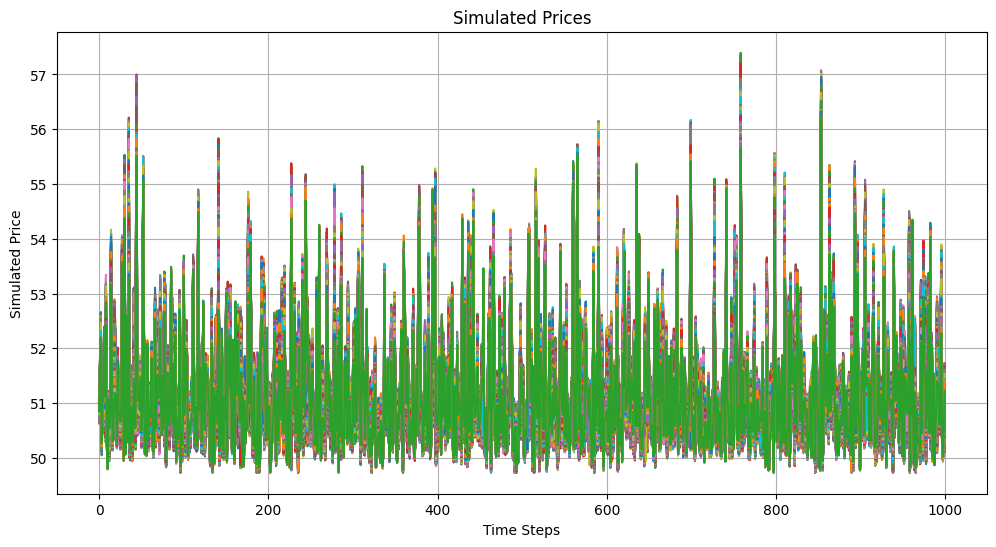

In [38]:
# prompt: plot simulated_prices

import matplotlib.pyplot as plt

# Assuming simulated_prices is a NumPy array or a list of prices
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices)  # Plotting simulated prices over time
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Simulated Prices")
plt.grid(True)
plt.show()